In [1]:
#Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#Importing more dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
#Python SQL toolkit and Object Relation Mapper (ORM)
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
#Createing engine to hawaii.sqlite
engine = create_engine("sqlite:///Data/hawaii.sqlite")

In [5]:
#reflect an existing database into a new model
Base = automap_base()

#reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
#view the classes that have been found
Base.classes.keys()

['measurement', 'station']

In [7]:
#creating references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
#create the session link from Python to DB
Session = Session(engine)

# Exploratory Precipition Analysis

In [9]:
#Find the most recent date set
Session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [19]:
#create a query to find the last 12 months of precipitation data and plot the results

#start with the most recent data point


#calculate the date one year from the last date
year_ago = dt.date(2017,8,23)- dt.timedelta(days=365)

#peforme a query to retrieve data and precipitation scores
rain_data = Session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()


#save queery results as pd df and set index to date column
precipitation_df= pd.DataFrame(rain_data)
precipitation_df = precipitation_df.rename(columns={'date':'Date', 'prcp': 'Precipitation (Inches)'})
precipitation_df=precipitation_df.set_index('Date')

#sort the dataframe by date
precipitation_df=precipitation_df.sort_values(by=['Date'])

#geting rid of NaN
#precipitation_df = precipitation_df.dropna()
precipitation_df.head()


,Precipitation (Inches)
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


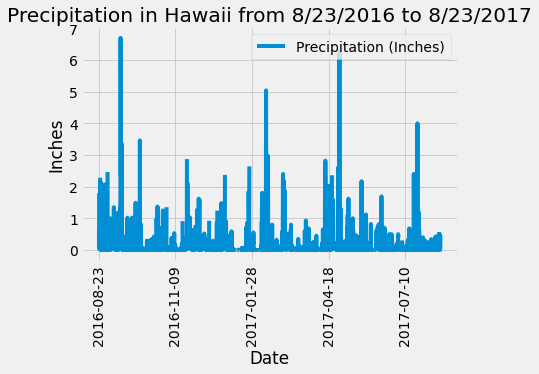

In [20]:
#use pd plotting with matplotlib to plot data
precipitation_df.plot(rot=90, title = "Precipitation in Hawaii from 8/23/2016 to 8/23/2017", ylabel= "Inches")

plt.show()

In [21]:
#Use Pandas to calculate summary statistics
precipitation_df.describe()

,Precipitation (Inches)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000
